In [1]:
import sys
sys.path.insert(0, '.')
import argparse
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import cv2


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/BiSeNet')

In [4]:
import lib.transform_cv2 as T
from lib.models import model_factory
from configs import set_cfg_from_file



In [5]:
torch.set_grad_enabled(False)
np.random.seed(123)

## bisenetv2
cfg = dict(
    model_type='bisenetv2',
    num_aux_heads=4,
    lr_start = 5e-3,
    weight_decay=5e-4,
    warmup_iters = 1000,
    max_iter = 150000,
    dataset='CityScapes',
    im_root='./datasets/cityscapes',
    train_im_anns='./datasets/cityscapes/train.txt',
    val_im_anns='./datasets/cityscapes/val.txt',
    scales=[0.25, 2.],
    cropsize=[512, 1024],
    ims_per_gpu=8,
    eval_ims_per_gpu=2,
    use_fp16=True,
    use_sync_bn=True,
    respth='./res',
)



In [6]:

palette = np.random.randint(0, 256, (256, 3), dtype=np.uint8)



In [7]:
# define model
net = model_factory['bisenetv2'](19)
net.load_state_dict(torch.load('/content/gdrive/My Drive/BiSeNet/model_final_v2.pth', map_location='cpu'))
net.eval()




Downloading: "https://github.com/CoinCheung/BiSeNet/releases/download/0.0.0/backbone_v2.pth" to /root/.cache/torch/hub/checkpoints/backbone_v2.pth


BiSeNetV2(
  (detail): DetailBranch(
    (S1): Sequential(
      (0): ConvBNReLU(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (1): ConvBNReLU(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (S2): Sequential(
      (0): ConvBNReLU(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (1): ConvBNReLU(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1

In [8]:
# prepare data
to_tensor = T.ToTensor(
    mean=(0.3257, 0.3690, 0.3223), # city, rgb
    std=(0.2112, 0.2148, 0.2115),
)
im = cv2.imread('/content/gdrive/My Drive/BiSeNet/example.png')[:, :, ::-1]
im = to_tensor(dict(im=im, lb=None))['im'].unsqueeze(0)



In [15]:
# inference
out = net(im)[0].argmax(dim=1).squeeze().detach().cpu().numpy()
pred = palette[out]


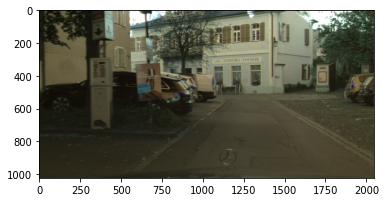

In [17]:
input = cv2.imread('/content/gdrive/My Drive/BiSeNet/example.png')
import matplotlib.pyplot as plt
plt.imshow(input)


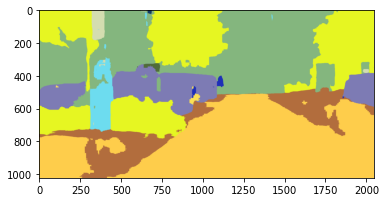

In [18]:
plt.imshow(pred)